In [ ]:
# Loading the libraries and datasets
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Ausmen = pd.read_csv("AusOpen-men-2013.csv")
Auswomen = pd.read_csv("AusOpen-women-2013.csv")

Frenchmen = pd.read_csv("FrenchOpen-men-2013.csv")
Frenchwomen = pd.read_csv("FrenchOpen-women-2013.csv")

USmen = pd.read_csv("USOpen-men-2013.csv")
USwomen = pd.read_csv("USOpen-women-2013.csv")

Wimbmen = pd.read_csv("Wimbledon-men-2013.csv")
Wimbwomen = pd.read_csv("Wimbledon-women-2013.csv")

# Swapping the faulty columns in the dataset
Ausmen.columns = Auswomen.columns = Frenchmen.columns = Frenchwomen.columns  = USmen.columns  = ['Player1', 'Player2', 'Round', 'Result', 'FNL.1', 'FNL.2', 'FSP.1',
       'FSW.1', 'SSP.1', 'SSW.1', 'ACE.1', 'DBF.1', 'WNR.1', 'UFE.1', 'BPW.1',
       'BPC.1', 'NPW.1', 'NPA.1', 'TPW.1', 'ST1.1', 'ST2.1', 'ST3.1', 'ST4.1',
       'ST5.1', 'FSP.2', 'FSW.2', 'SSP.2', 'SSW.2', 'ACE.2', 'DBF.2', 'WNR.2',
       'UFE.2', 'BPW.2', 'BPC.2', 'NPW.2', 'NPA.2', 'TPW.2', 'ST1.2', 'ST2.2',
       'ST3.2', 'ST4.2', 'ST5.2']

Question1: Do players who win the first set of a match tend to win more matches overall? Is there a relationship between winning the first set and the final outcome of the match? Hypothesis: Winning the first set may give players a psychological advantage and increase their confidence, leading to better performance in subsequent sets. Do the analysis for AusOpen-men and women datasets

In [ ]:
# For male players
# Create a new column indicating whether the player who won the first set ultimately won the match
Ausmen['FirstSetWinner'] = Ausmen['ST1.1'] > Ausmen['ST1.2']

# Calculate the overall win rate for players who won the first set vs. those who did not
first_set_win_rate_men_p1 = Ausmen[Ausmen['FirstSetWinner'] == True]['Result'].value_counts(normalize=True)
no_first_set_win_rate_men_p1 = Ausmen[Ausmen['FirstSetWinner'] == False]['Result'].value_counts(normalize=True)

# Print the win rates for each group
print("For male players")
print("Win rate for player1 if he wins the first set (1 represents player1 won the game):")
print(first_set_win_rate_men_p1)
print("\nWin rate for player1 if he did not win the first set (1 represents player1 won the game):")
print(no_first_set_win_rate_men_p1)

print("")
print("")

# For female players
# Create a new column indicating whether the player who won the first set ultimately won the match
Auswomen['FirstSetWinner'] = Auswomen['ST1.1'] > Auswomen['ST1.2']

# Calculate the overall win rate for players who won the first set vs. those who did not
first_set_win_rate_men_p1 = Auswomen[Auswomen['FirstSetWinner'] == True]['Result'].value_counts(normalize=True)
no_first_set_win_rate_men_p1 = Auswomen[Auswomen['FirstSetWinner'] == False]['Result'].value_counts(normalize=True)

# Print the win rates for each group
print("For Female players")
print("Win rate for player1 if she wins the first set (1 represents player1 won the game):")
print(first_set_win_rate_men_p1)
print("\nWin rate for player1 if she did not win the first set (1 represents player1 won the game):")
print(no_first_set_win_rate_men_p1)

For male players
Win rate for player1 if he wins the first set (1 represents player1 won the game):
1    0.80303
0    0.19697
Name: Result, dtype: float64

Win rate for player1 if he did not win the first set (1 represents player1 won the game):
0    0.766667
1    0.233333
Name: Result, dtype: float64


For Female players
Win rate for player1 if she wins the first set (1 represents player1 won the game):
1    0.84375
0    0.15625
Name: Result, dtype: float64

Win rate for player1 if she did not win the first set (1 represents player1 won the game):
0    0.809524
1    0.190476
Name: Result, dtype: float64


Question2: Do women handle break points more effectively than men?
Hypothesis: Players who face a higher number of break points may experience greater pressure and be more likely to make unforced errors, leading to a lower overall win rate. Perform the analysis using the following datasets
Wimbmen = pd.read_csv("Wimbledon-men-2013.csv")
, Wimbwomen = pd.read_csv("Wimbledon-women-2013.csv")

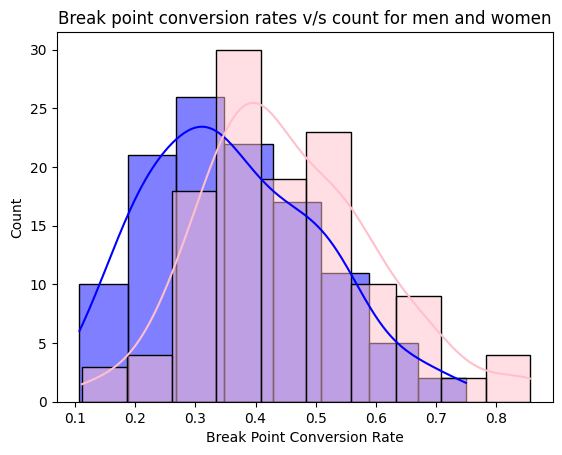

In [ ]:
# create a function to calculate break point conversion rate
def bp_conversion_rate(df):
    df['BPW.1'] = df['BPW.1'].astype(float)
    df['BPC.2'] = df['BPC.2'].astype(float)
    df['BPW.2'] = df['BPW.2'].astype(float)
    df['BPC.1'] = df['BPC.1'].astype(float)
    df['Total BP Faced'] = df['BPC.1'] + df['BPC.2']
    df['Total BP Saved'] = df['BPW.1'] + df['BPW.2']
    df['Break Point Conversion Rate'] = df['Total BP Saved'] / df['Total BP Faced']
    return df[['Player1', 'Player2', 'Break Point Conversion Rate']]

# calculate break point conversion rate for men and women
men_conversion_rate = bp_conversion_rate(Wimbmen)
women_conversion_rate = bp_conversion_rate(Wimbwomen)

# plot the distribution of break point conversion rate for men and women
sns.histplot(data=men_conversion_rate, x="Break Point Conversion Rate", kde=True, color='blue')
sns.histplot(data=women_conversion_rate, x="Break Point Conversion Rate", kde=True, color='pink')
plt.title("Break point conversion rates v/s count for men and women")
plt.show()

Question3: Are there certain types of errors that are more common among players who lose matches? For example, do players who hit more double faults (DBF) or unforced errors (UFE) tend to lose more often? Perform the analysis using the French men's tournament.

In [ ]:
# calculate the percentage of double faults and unforced errors for each player
Frenchmen['DF%1'] = Frenchmen['DBF.1'] / Frenchmen['FNL.1'].replace(0, float('nan'))
Frenchmen['DF%2'] = Frenchmen['DBF.2'] / Frenchmen['FNL.2'].replace(0, float('nan'))
Frenchmen['UFE%1'] = Frenchmen['UFE.1'] / Ausmen['TPW.1']
Frenchmen['UFE%2'] = Frenchmen['UFE.2'] / Frenchmen['TPW.2']

# calculate the average double faults and unforced errors for player1 when he won and lost the game
winners = Frenchmen[Frenchmen['Result'] == 1]
losers = Frenchmen[Frenchmen['Result'] == 0]
avg_win_df_p1 = winners['DF%1'].mean()
avg_win_ufe_p1 = winners['UFE%1'].mean()
avg_lose_df_p1 = losers['DF%1'].dropna().mean()
avg_lose_ufe_p1 = losers['UFE%1'].dropna().mean()

# print the results
print("Average double faults for player 1 if he wins the game:", avg_win_df_p1)
print("Average unforced errors for player 1 if he wins the game:", avg_win_ufe_p1)
print("Average double faults for player 1 if he loses the game:", avg_lose_df_p1)
print("Average unforced errors for player 1 if he loses the game:", avg_lose_ufe_p1)
print("")

# calculate the average double faults and unforced errors for player2 when he won and lost the game
winners = Frenchmen[Frenchmen['Result'] == 0]
losers = Frenchmen[Frenchmen['Result'] == 1]
avg_win_df_p2 = winners['DF%2'].mean()
avg_win_ufe_p2 = winners['UFE%2'].mean()
avg_lose_df_p2 = losers['DF%2'].dropna().mean()
avg_lose_ufe_p2 = losers['UFE%2'].dropna().mean()

print("Average double faults for player 2 if he wins the game:", avg_win_df_p2)
print("Average unforced errors for player 2 if he wins the game:", avg_win_ufe_p2)
print("Average double faults for player 2 if he loses the game:", avg_lose_df_p2)
print("Average unforced errors for player 2 if he loses the game:", avg_lose_ufe_p2)

Average double faults for player 1 if he wins the game: 0.9124293785310734
Average unforced errors for player 1 if he wins the game: 0.3325015331096458
Average double faults for player 1 if he loses the game: 3.2037037037037037
Average unforced errors for player 1 if he loses the game: 0.3620341092718636

Average double faults for player 2 if he wins the game: 1.1171875
Average unforced errors for player 2 if he wins the game: 0.27438869583606706
Average double faults for player 2 if he loses the game: 3.8035714285714284
Average unforced errors for player 2 if he loses the game: 0.43259970372940104


Question4: How does the distribution of breakpoints won differ between winning and losing players? Perform the analysis for the US men's tournament.
Hypothesis: The winning players tend to have more breakpoint wins.


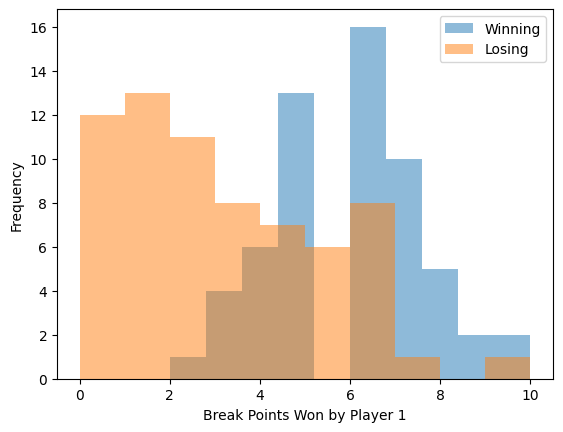

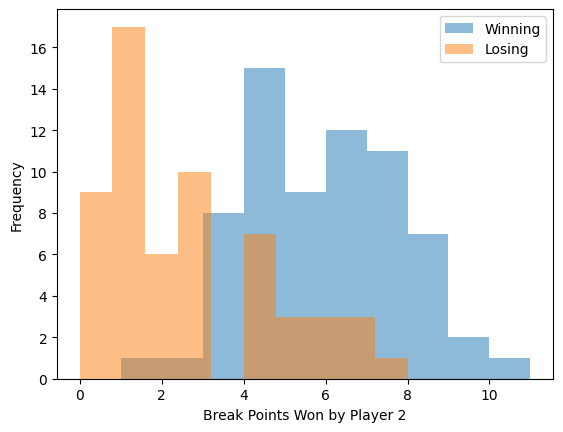

In [ ]:
# Load the dataset
df = USmen

# Plot the distributions of break points won and created for winning and losing players
plt.hist(df[df["Result"] == 1]["BPW.1"], alpha=0.5, label="Winning")
plt.hist(df[df["Result"] == 0]["BPW.1"], alpha=0.5, label="Losing")
plt.xlabel("Break Points Won by Player 1")
plt.ylabel("Frequency")
plt.legend()
plt.show()
plt.hist(df[df["Result"] == 0]["BPW.2"], alpha=0.5, label="Winning")
plt.hist(df[df["Result"] == 1]["BPW.2"], alpha=0.5, label="Losing")
plt.xlabel("Break Points Won by Player 2")
plt.ylabel("Frequency")
plt.legend()
plt.show()

Question5: Find which sets are won more by winning players. Perform the analysis using the US men's tournament dataset.

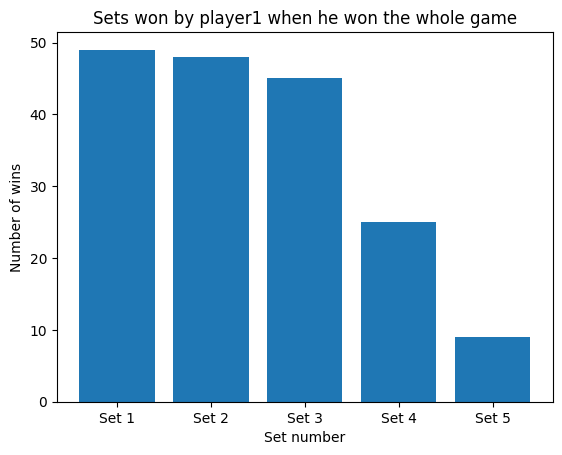

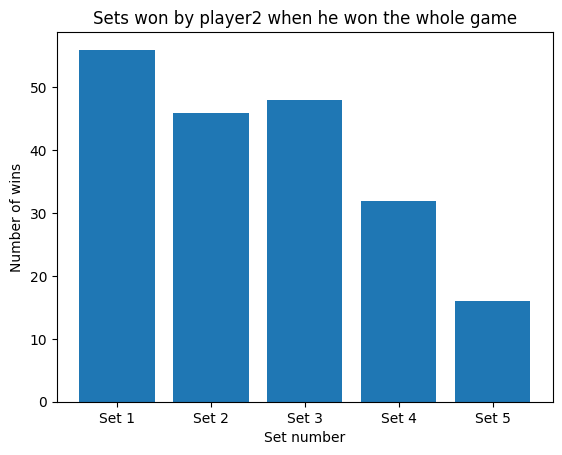

In [ ]:
df = USmen
# Filter the dataset to include only matches won by Player 1
df_wins = df[df["Result"] == 1]

# Count the number of times each set is won by Player 1
set_wins = {"Set 1": 0, "Set 2": 0, "Set 3": 0, "Set 4": 0, "Set 5": 0}
for i, row in df_wins.iterrows():
    if row["ST1.1"] > row["ST1.2"]:
        set_wins["Set 1"] += 1
    if row["ST2.1"] > row["ST2.2"]:
        set_wins["Set 2"] += 1
    if row["ST3.1"] > row["ST3.2"]:
        set_wins["Set 3"] += 1
    if row["ST4.1"] > row["ST4.2"]:
        set_wins["Set 4"] += 1
    if row["ST5.1"] > row["ST5.2"]:
        set_wins["Set 5"] += 1

# Plot a bar chart of the set wins
plt.bar(set_wins.keys(), set_wins.values())
plt.title("Sets won by player1 when he won the whole game")
plt.xlabel("Set number")
plt.ylabel("Number of wins")
plt.show()


# Filter the dataset to include only matches won by Player 1
df_wins = df[df["Result"] == 0]

# Count the number of times each set is won by Player 1
set_wins = {"Set 1": 0, "Set 2": 0, "Set 3": 0, "Set 4": 0, "Set 5": 0}
for i, row in df_wins.iterrows():
    if row["ST1.1"] < row["ST1.2"]:
        set_wins["Set 1"] += 1
    if row["ST2.1"] < row["ST2.2"]:
        set_wins["Set 2"] += 1
    if row["ST3.1"] < row["ST3.2"]:
        set_wins["Set 3"] += 1
    if row["ST4.1"] < row["ST4.2"]:
        set_wins["Set 4"] += 1
    if row["ST5.1"] < row["ST5.2"]:
        set_wins["Set 5"] += 1

# Plot a bar chart of the set wins
plt.bar(set_wins.keys(), set_wins.values())
plt.title("Sets won by player2 when he won the whole game")
plt.xlabel("Set number")
plt.ylabel("Number of wins")
plt.show()

Question6: Does the performance of a player in one aspect, such as first serve percentage, tend to compensate for a poor performance in another aspect, such as unforced errors? Perform the analysis for the French women’s tournament.

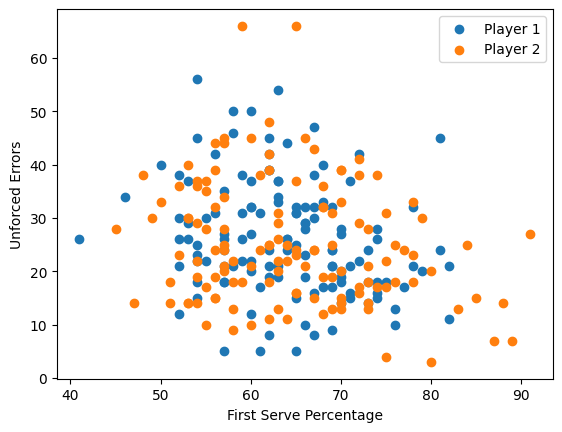

Correlation coefficient between FSP and UFE for Player 1: -0.2345493675179591
Correlation coefficient between FSP and UFE for Player 2: -0.21582848633734647


In [ ]:
# Load the dataset
tennis_data = Frenchwomen

# Remove unnecessary columns
tennis_data = tennis_data.drop(['Player1', 'Player2', 'Result', 'SSP.1', 'SSP.2', 'ACE.1', 'ACE.2', 'DBF.1', 'DBF.2',
                                'BPC.1', 'BPC.2', 'BPW.1', 'BPW.2', 'NPA.1', 'NPA.2', 'NPW.1', 'NPW.2', 'ST1.1', 'ST2.1',
                                'ST3.1', 'ST4.1', 'ST5.1', 'ST1.2', 'ST2.2', 'ST3.2', 'ST4.2', 'ST5.2', 'Round'], axis=1)

# Remove missing values
tennis_data = tennis_data.dropna()

# Create a scatter plot of FSP vs UFE for each player
plt.scatter(tennis_data['FSP.1'], tennis_data['UFE.1'], label='Player 1')
plt.scatter(tennis_data['FSP.2'], tennis_data['UFE.2'], label='Player 2')
plt.xlabel('First Serve Percentage')
plt.ylabel('Unforced Errors')
plt.legend()
plt.show()

# Calculate the correlation coefficient between FSP and UFE
corr1 = tennis_data['FSP.1'].corr(tennis_data['UFE.1'])
corr2 = tennis_data['FSP.2'].corr(tennis_data['UFE.2'])
print("Correlation coefficient between FSP and UFE for Player 1:", corr1)
print("Correlation coefficient between FSP and UFE for Player 2:", corr2)

Question7: Do players who attempt more net points tend to win more games than those who don't? Does the number of net points attempted by players correlate with the final number of games won? Perform the analysis using the US women's tournament dataset.
Hypothesis: There should be a positive correlation, as it is one of the best ways to pressure opponents.


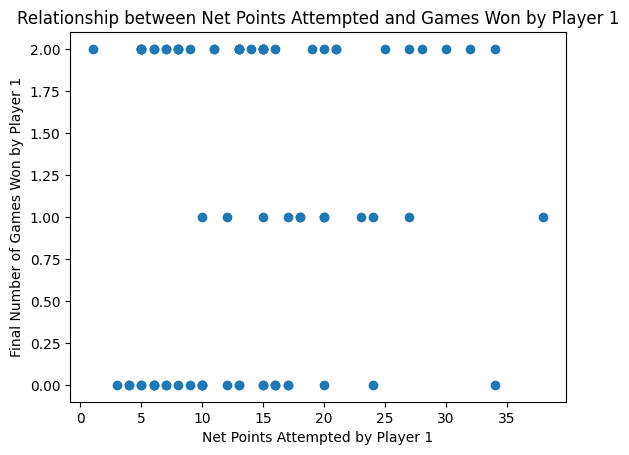

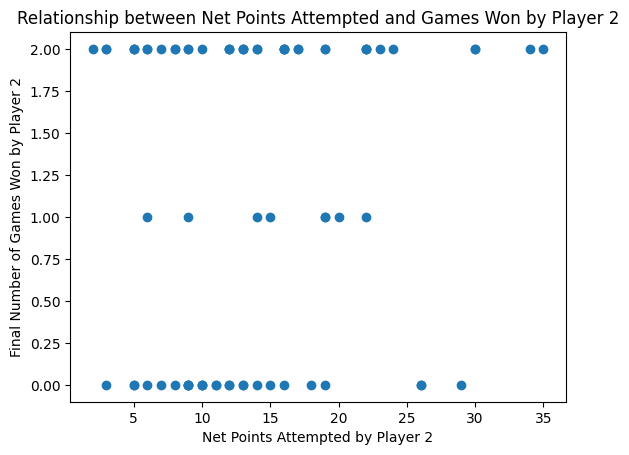

Correlation between Net Points Attempted and Games Won by Player 1: 0.13536465330530711
Correlation between Net Points Attempted and Games Won by Player 2: 0.12690060203898848


In [ ]:
# Load the tennis dataset
tennis_df = USwomen

# Create a scatter plot for Player 1
plt.scatter(tennis_df["NPA.1"], tennis_df["FNL.1"])
plt.xlabel("Net Points Attempted by Player 1")
plt.ylabel("Final Number of Games Won by Player 1")
plt.title("Relationship between Net Points Attempted and Games Won by Player 1")
plt.show()

# Create a scatter plot for Player 2
plt.scatter(tennis_df["NPA.2"], tennis_df["FNL.2"])
plt.xlabel("Net Points Attempted by Player 2")
plt.ylabel("Final Number of Games Won by Player 2")
plt.title("Relationship between Net Points Attempted and Games Won by Player 2")
plt.show()

# Calculate the correlation coefficient for Player 1
corr_player1 = tennis_df["NPA.1"].corr(tennis_df["FNL.1"])
print("Correlation between Net Points Attempted and Games Won by Player 1:", corr_player1)

# Calculate the correlation coefficient for Player 2
corr_player2 = tennis_df["NPA.2"].corr(tennis_df["FNL.2"])
print("Correlation between Net Points Attempted and Games Won by Player 2:", corr_player2)


Question8: Is there a correlation between a player's first serve percentage and their number of double faults? Perform the analysis using the French men’s tournament dataset.
Hypothesis: Players with a higher first-serve percentage will commit fewer double faults on average as they are good at                     serving.


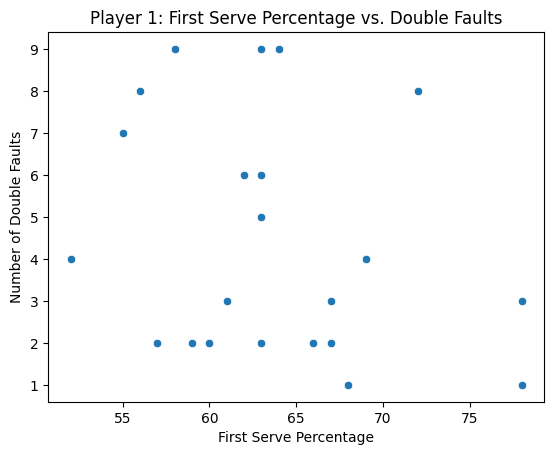

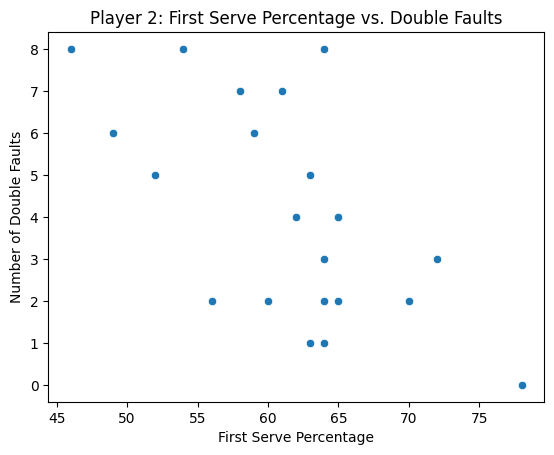

Correlation coefficient for Player1:  -0.2771748374895958
Correlation coefficient for Player2:  -0.6209108028593923


In [ ]:
# read in the dataset
df = Frenchmen
df.dropna(inplace=True)

# create scatter plot for player 1
sns.scatterplot(x='FSP.1', y='DBF.1', data=df)
plt.title('Player 1: First Serve Percentage vs. Double Faults')
plt.xlabel('First Serve Percentage')
plt.ylabel('Number of Double Faults')
plt.show()

# create scatter plot for player 2
sns.scatterplot(x='FSP.2', y='DBF.2', data=df)
plt.title('Player 2: First Serve Percentage vs. Double Faults')
plt.xlabel('First Serve Percentage')
plt.ylabel('Number of Double Faults')
plt.show()
# calculate correlation coefficients for player 1
corr1 = np.corrcoef(df['FSP.1'], df['DBF.1'])[0, 1]
print("Correlation coefficient for Player1: ", corr1)

# calculate correlation coefficients for player 2
corr2 = np.corrcoef(df['FSP.2'], df['DBF.2'])[0, 1]
print("Correlation coefficient for Player2: ", corr2)
